In [1]:

# basic
import numpy as np
import pandas as pd 
import datetime as dt 
from pandas_datareader import data as pdr 

# regression
import  statsmodels.api  as sm 

# visulization
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 

In [2]:
class Ken_French_Library():
    """
    Fama/French 3 Factors [Weekly]
    Fama/French 3 Factors [Daily]
    """

    def __init__(self,start,periods):

        self.start = start 
        self.periods = periods
    
    def get_data(self):

        research_factors = pdr.DataReader('F-F_Research_Data_Factors_'+str(self.periods),
                                      'famafrench', start=self.start)[0] 
        momentum_factor = pdr.DataReader('F-F_Momentum_Factor_daily',
                                     'famafrench', start=self.start)[0]

        five_factors = research_factors.join(momentum_factor).dropna()
        five_factors /= 100.
        five_factors.index = five_factors.index.tz_localize('utc')

        five_factors.columns = five_factors.columns.str.strip()

        self.five_factors = pd.DataFrame(five_factors)
        self.five_factors = self.five_factors.reset_index()
        self.five_factors['Date'] = self.five_factors.apply(lambda x : self.Address_Date(x['Date']),axis=1)
        self.five_factors.index   = self.five_factors['Date']
        self.five_factors = self.five_factors.drop(['Date'],axis=1)
        
        return self.five_factors
    
    def Address_Date(self,date):
        
        date = str(date)
        return date[:10]
        

    def __len__(self):
        return self.five_factors.shape[0]

Fama_French =  Ken_French_Library(start=dt.datetime(2012,1,1),periods='Daily')
FF_DF       =  Fama_French.get_data()
FF_DF

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2012-01-03,0.0150,-0.0020,0.0094,0.0,-0.0261
2012-01-04,0.0000,-0.0064,0.0003,0.0,0.0011
2012-01-05,0.0039,0.0018,0.0019,0.0,-0.0059
2012-01-06,-0.0019,0.0002,-0.0026,0.0,-0.0008
2012-01-09,0.0028,0.0024,-0.0005,0.0,-0.0034
...,...,...,...,...,...
2021-06-24,0.0068,0.0062,0.0023,0.0,0.0071
2021-06-25,0.0032,-0.0068,0.0046,0.0,-0.0058
2021-06-28,0.0023,-0.0048,-0.0159,0.0,0.0011


In [3]:
class Company_Data():
    """
    ticker     --> list (str)
    start ,end --> datetime 
    peirods    --> string
    """
    def __init__(self,tickers,start,end,periods):

        self.start   = start 
        self.end     = end 
        self.tickers = tickers
        self.periods = periods
    
    def get_data(self,ticker):

        self.df = pdr.get_data_yahoo(ticker,self.start,self.end).reset_index()
   
        return self.df 
    
    def Address_Date(self,date):
        
        date = str(date)
        return date[:10]
        
    def get_price_data(self):

        for i , ticker in enumerate(self.tickers) : 
            
            if i == 0 :
                Price_DF = self.get_data(ticker)
                Price_DF = Price_DF[['Date','Close']]
                Price_DF.columns = ['Date',str(ticker)]
            else:
                Merge_DF = self.get_data(ticker)[['Date','Close']]
                Merge_DF.columns = ['Date',str(ticker)]
                Price_DF = Price_DF.merge(Merge_DF,how='outer')
        
        Price_DF = Price_DF.fillna(value=0)
        Price_DF['Date'] = Price_DF.apply(lambda x : self.Address_Date(x['Date']),axis=1)
        Price_DF.index = Price_DF['Date']
        Price_DF = Price_DF.drop(['Date'],axis=1)
        

        return Price_DF

# ------------ Company_DF parameters ------------ 
start   = dt.datetime(2012,1,1)
end     = dt.datetime.now()
tickers = ['AAPL',"MSFT","SHOP","INTC","TSLA","JPM","MS","GS","BAC","UBS",]

# ------------ ------------ ------------ ------------ 

Company_Price = Company_Data(tickers=tickers,start=start,end=end,periods="Daily")
Stock_DF      = Company_Price.get_price_data()
Stock_DF 

,AAPL,MSFT,SHOP,INTC,TSLA,JPM,MS,GS,BAC,UBS
Date,,,,,,,,,,
2012-01-03,14.686786,26.770000,0.000000,24.540001,5.616000,34.980000,16.080000,95.360001,5.800000,12.380000
2012-01-04,14.765714,27.400000,0.000000,25.110001,5.542000,34.950001,15.940000,94.739998,5.810000,12.330000
2012-01-05,14.929643,27.680000,0.000000,25.400000,5.424000,35.680000,16.280001,94.580002,6.310000,11.880000
2012-01-06,15.085714,28.110001,0.000000,25.250000,5.382000,35.360001,15.900000,93.419998,6.180000,11.620000
2012-01-09,15.061786,27.740000,0.000000,25.469999,5.450000,35.299999,16.200001,94.690002,6.270000,11.280000
...,...,...,...,...,...,...,...,...,...,...
2021-08-16,151.119995,294.600006,1489.000000,53.470001,686.169983,158.929993,103.720001,408.350006,41.290001,17.070000
2021-08-17,150.190002,293.079987,1481.869995,52.689999,665.710022,157.009995,102.870003,404.970001,41.090000,16.870001
2021-08-18,146.360001,290.730011,1489.180054,52.189999,688.989990,155.580002,101.260002,398.799988,40.790001,16.780001


In [4]:
AAPL            = Stock_DF['AAPL'].reset_index(name='Stock Price') # a portfolio return
AAPL['Return']  = AAPL['Stock Price'].pct_change()
AAPL = AAPL.dropna()
AAPL.index = AAPL['Date']
AAPL = AAPL.drop(['Date'],axis=1)
AAPL = pd.merge(AAPL,FF_DF,how='inner',left_index=True, right_index=True)
AAPL

,Stock Price,Return,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,,,
2012-01-04,14.765714,0.005374,0.0000,-0.0064,0.0003,0.0,0.0011
2012-01-05,14.929643,0.011102,0.0039,0.0018,0.0019,0.0,-0.0059
2012-01-06,15.085714,0.010454,-0.0019,0.0002,-0.0026,0.0,-0.0008
2012-01-09,15.061786,-0.001586,0.0028,0.0024,-0.0005,0.0,-0.0034
2012-01-10,15.115714,0.003580,0.0097,0.0039,0.0041,0.0,-0.0112
...,...,...,...,...,...,...,...
2021-06-24,133.410004,-0.002169,0.0068,0.0062,0.0023,0.0,0.0071
2021-06-25,133.110001,-0.002249,0.0032,-0.0068,0.0046,0.0,-0.0058
2021-06-28,134.779999,0.012546,0.0023,-0.0048,-0.0159,0.0,0.0011


In [5]:
import statsmodels.api as sm 


Factor = ['Mkt-RF','SMB','HML','Mom']

Y_rolling = AAPL['Return'].rolling(window=30)
X_rolling = AAPL[Factor].rolling(window=30)

Factor_Beta = pd.DataFrame()
Index = []

for x,y in zip(X_rolling,Y_rolling) :

    x = sm.add_constant(x.values)
    index = y.index[-1]
    y = y.values 

    if x.shape[0] >= 30 : 

        Index.append(index)
        model  = sm.OLS(y,x)
        res    =  model.fit()
        params = res.params
        params = pd.Series(params)
        Factor_Beta = Factor_Beta.append(params,ignore_index=True)


cols = ['Alpha']
cols.extend(Factor)
Factor_Beta.columns = cols
Factor_Beta.index   = Index 

Factor_Beta

,Alpha,Mkt-RF,SMB,HML,Mom
2012-02-15,0.002987,2.498853,-1.527020,-1.764303,0.526649
2012-02-16,0.003286,2.489523,-1.695137,-1.740403,0.511162
2012-02-17,0.002903,2.478091,-1.666493,-1.830736,0.501335
2012-02-21,0.003357,2.617462,-1.916155,-1.551455,0.604581
2012-02-22,0.003002,2.665909,-1.817300,-1.307748,0.654614
...,...,...,...,...,...
2021-06-24,-0.000560,1.362014,0.075540,-0.289692,-0.205399
2021-06-25,-0.001152,1.207319,0.053147,-0.386256,-0.057750
2021-06-28,-0.001026,1.209603,0.009323,-0.412678,-0.008492
2021-06-29,-0.000465,1.169863,-0.050606,-0.403002,0.029601


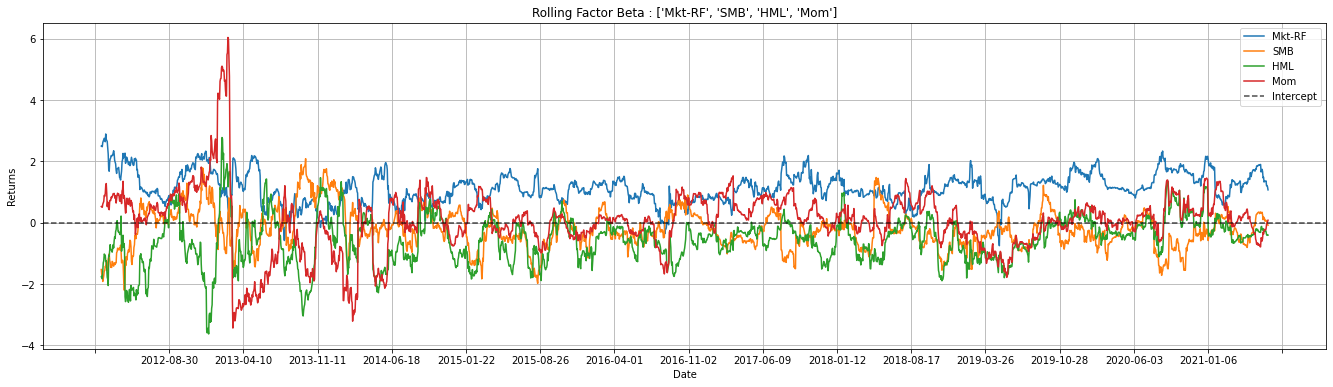

In [6]:

cols = Factor_Beta.columns
fig,ax = plt.subplots(figsize=(23,6))
ax.title.set_text( 'Rolling Factor Beta : '+str(cols[1:].to_list()) )

for i in range(len(cols)):

    if i == 0 : # alpha
        pass

    else:
        ax.plot(Factor_Beta.index , Factor_Beta[str(cols[i])],label=str(cols[i]))

plt.axhline(y=0,color='black',label='Intercept',linestyle="--",alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=150))
plt.grid()
plt.legend()
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()